In [1]:
!pip install python-louvain

In [2]:
try:
    # Attempt to import the community package more directly
    from community import community_louvain
except ImportError:
    print("Failed to import community_louvain directly from community package.")

# Check again for best_partition
if 'best_partition' in dir(community_louvain):
    print("Successfully found best_partition in community_louvain.")
else:
    print("best_partition still not found in community_louvain.")


Successfully found best_partition in community_louvain.


Number of communities detected: 11
Community 1 has 1201 members.


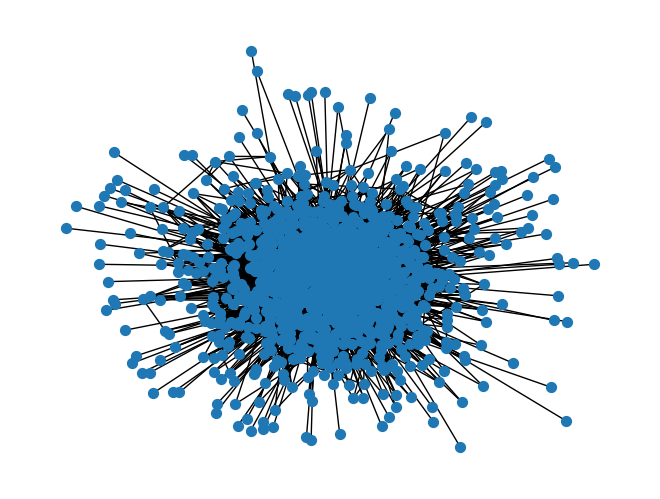

Community 2 has 2184 members.


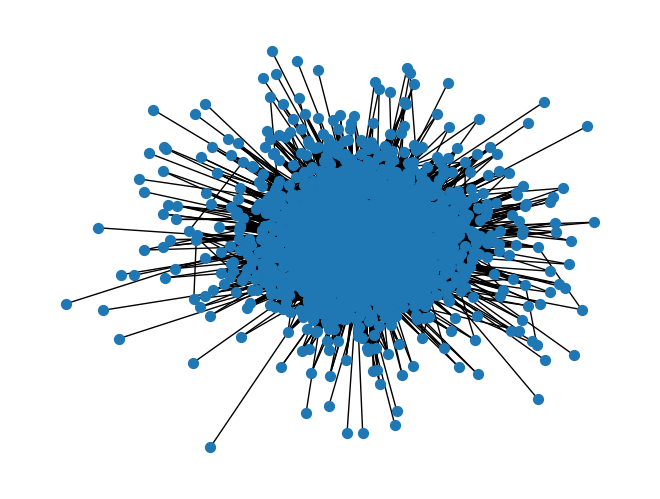

Community 3 has 2166 members.


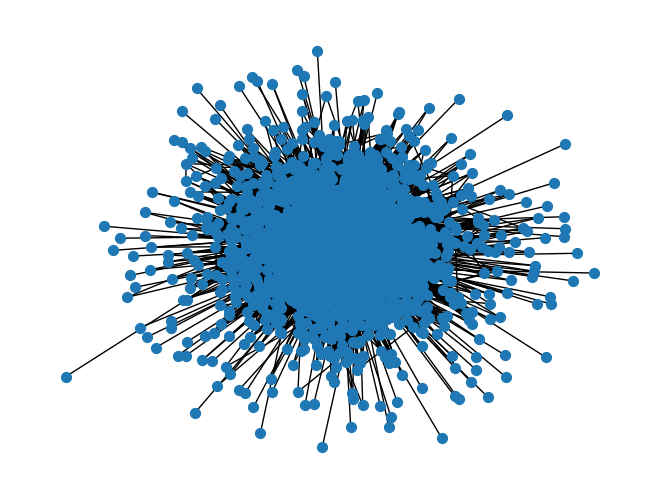

Community 4 has 2692 members.


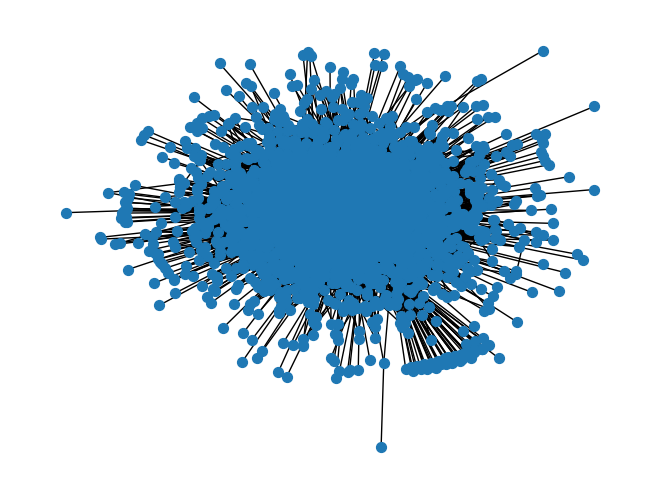

Community 5 has 5 members.


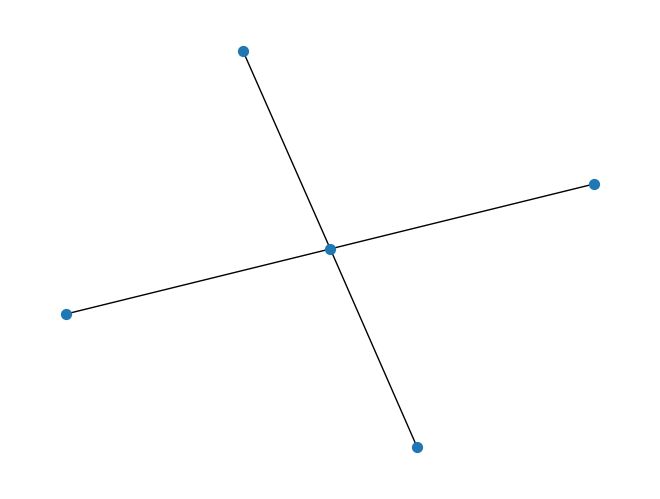

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Correctly import the community module
import community as community_louvain

# Load the dataset
data = pd.read_excel('/content/modified_online_retail_II.xlsx', usecols=['Source', 'Target'])

# Preprocess: Drop missing values and duplicates
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

# Initialize a bipartite graph
G = nx.Graph()

# Assuming 'Customer ID' and 'StockCode' represent our two node sets
customers = set(data['Target'])
products = set(data['Source'])

# Adding nodes with bipartite attribute
G.add_nodes_from(customers, bipartite=0)  # Add customer nodes
G.add_nodes_from(products, bipartite=1)  # Add product nodes

# Add edges based on transactions in the dataset
for _, row in data.iterrows():
    G.add_edge(row['Target'], row['Source'])

# Apply the Louvain method for community detection
partition = community_louvain.best_partition(G)

# Transform the partition into a list of communities
communities = {}
for node, comm_id in partition.items():
    communities.setdefault(comm_id, set()).add(node)

communities_list = list(communities.values())

# Display the number of communities detected
print(f"Number of communities detected: {len(communities_list)}")

# Optionally, visualize the first few communities (depending on their sizes)
for i, community in enumerate(communities_list[:5]):
    print(f"Community {i+1} has {len(community)} members.")
    subgraph = G.subgraph(community)
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, node_size=50, with_labels=False)
    plt.show()

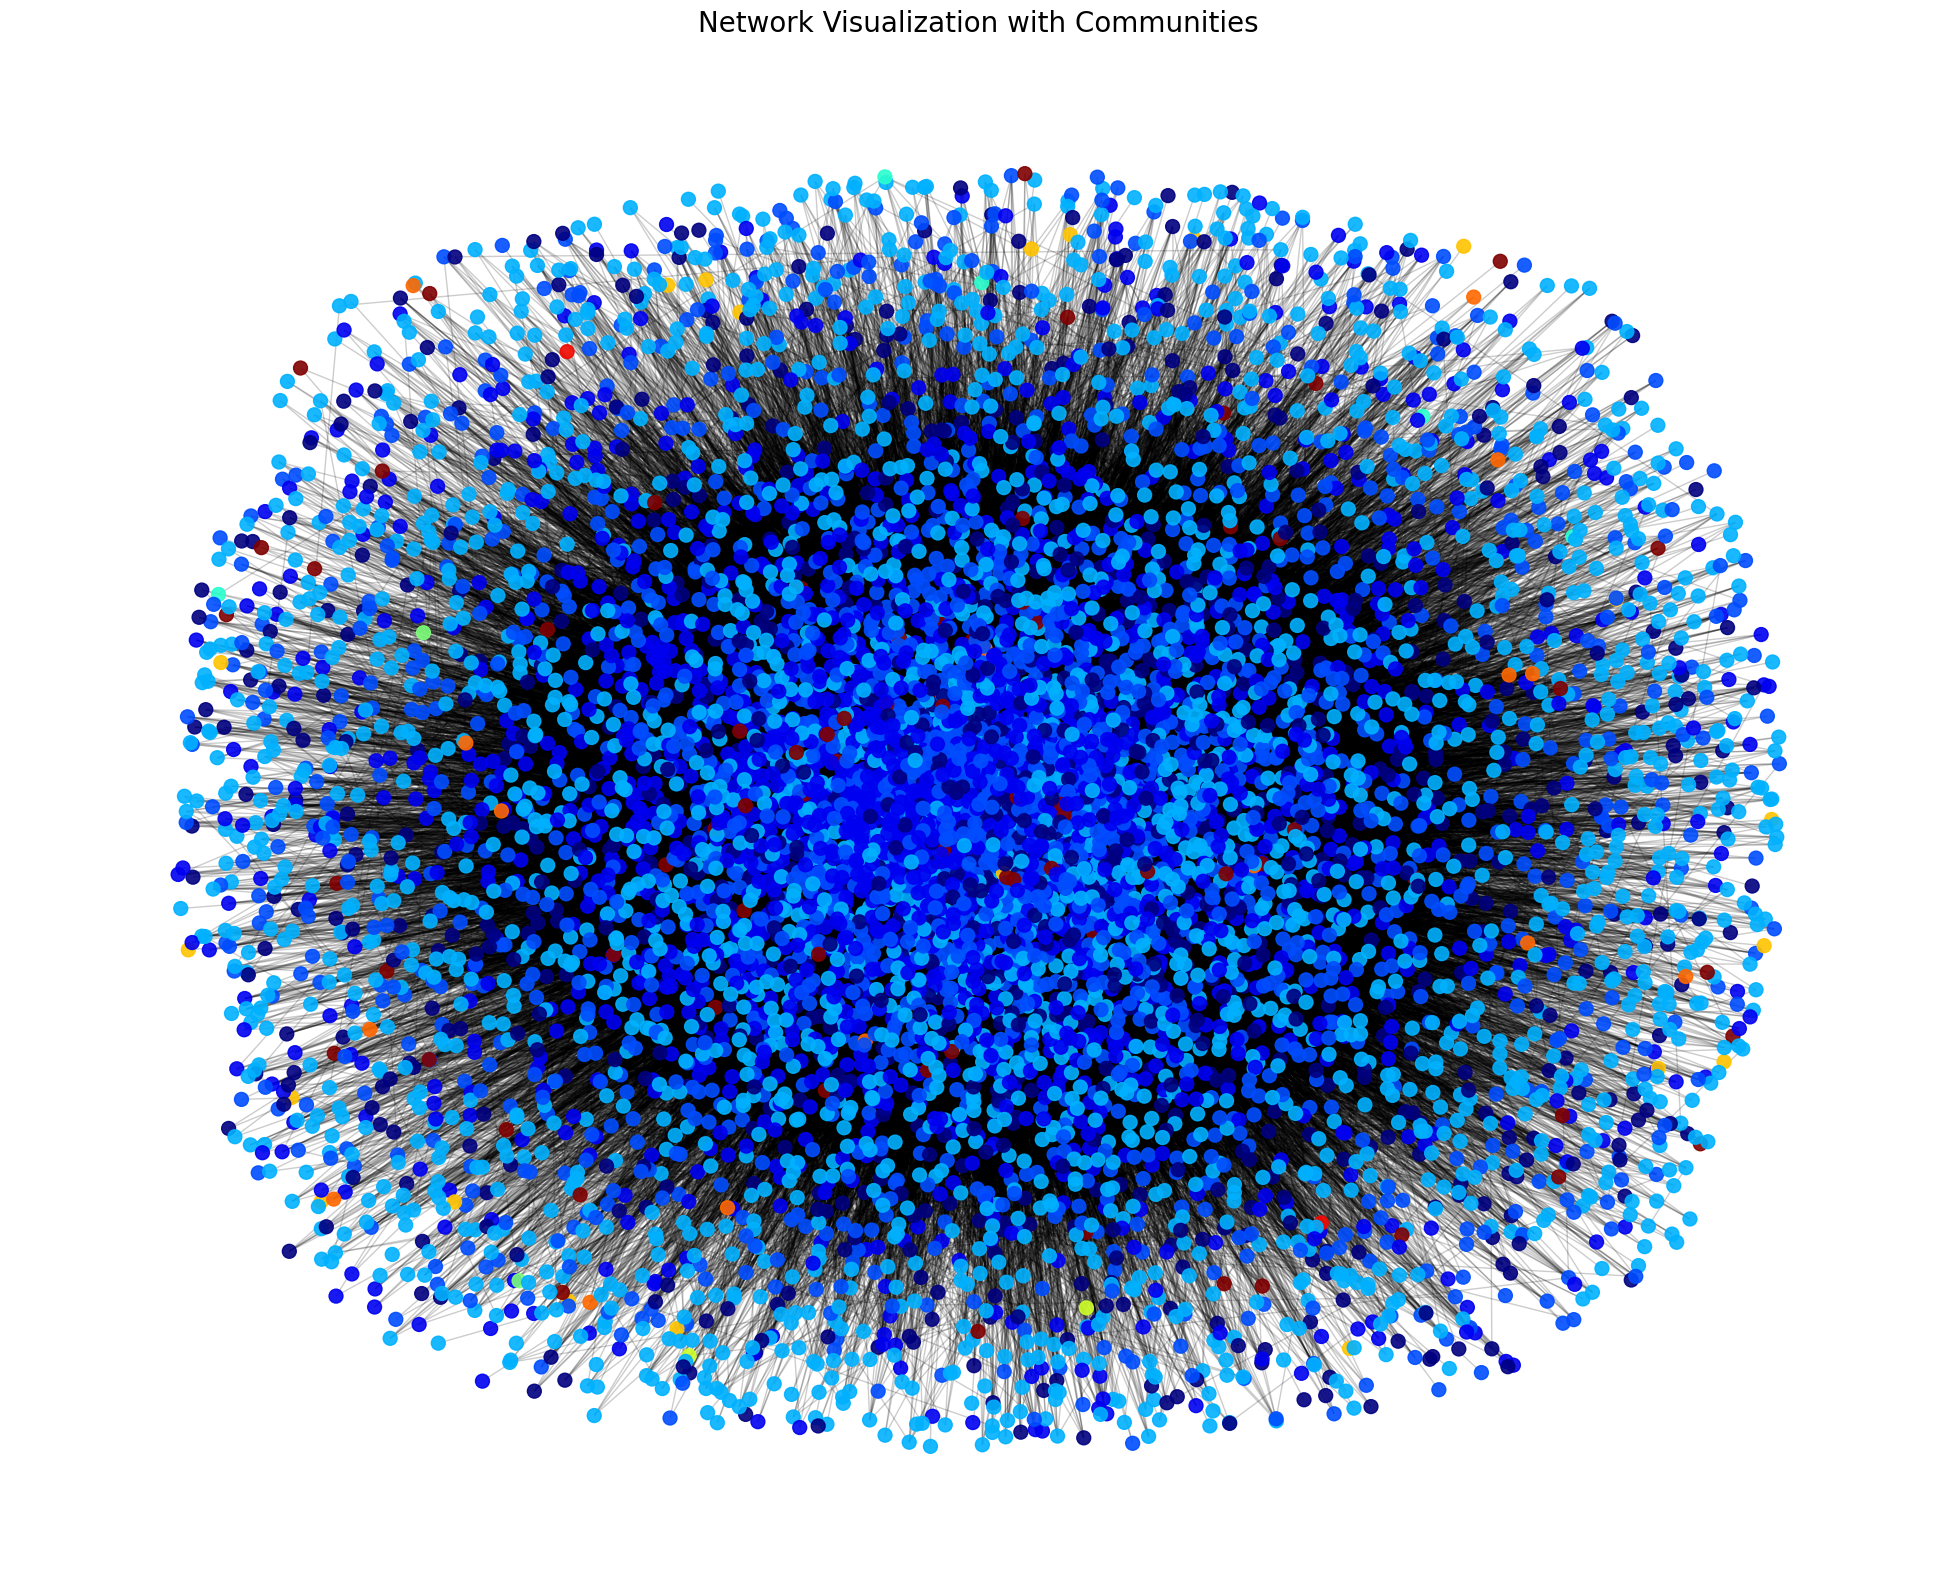

In [6]:
# Use a unique color for each community
community_colors = {node: partition[node] for node in G.nodes()}

plt.figure(figsize=(25, 20))

# Use a spring layout with specific parameters to spread nodes further apart
# Adjust the 'k' parameter to change the distance between nodes; larger values lead to more space between nodes
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Draw nodes, now with a larger size and adjust the alpha value for better visibility
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=list(community_colors.values()), cmap=plt.cm.jet, alpha=0.9)

# Draw edges, consider reducing edge visibility or removing them for clarity if the network is too dense
nx.draw_networkx_edges(G, pos, alpha=0.2)

plt.title('Network Visualization with Communities', fontsize=20)
plt.axis('off')
plt.show()

In [9]:
# Assuming you have a list of communities where each community is a set of nodes
communities_list = list(communities.values())

# Now, iterate over each community by its index and content (nodes within the community)
for i, community in enumerate(communities_list):
    # Filter product and customer nodes within this community
    product_nodes = set(node for node in community if node in products)  # Assuming 'products' is a set of all product nodes
    customer_nodes = set(node for node in community if node in customers)  # Assuming 'customers' is a set of all customer nodes

    # Perform your analysis on product_nodes and customer_nodes
    print(f"Community {i+1}:")
    print(f"Number of products: {len(product_nodes)}")
    print(f"Number of customers: {len(customer_nodes)}")
    # Add further detailed analysis as needed


Community 1:
Number of products: 448
Number of customers: 761
Community 2:
Number of products: 806
Number of customers: 1390
Community 3:
Number of products: 880
Number of customers: 1293
Community 4:
Number of products: 1845
Number of customers: 861
Community 5:
Number of products: 1
Number of customers: 4
Community 6:
Number of products: 34
Number of customers: 48
Community 7:
Number of products: 1
Number of customers: 1
Community 8:
Number of products: 1
Number of customers: 20
Community 9:
Number of products: 1
Number of customers: 1
Community 10:
Number of products: 13
Number of customers: 3
Community 11:
Number of products: 1
Number of customers: 1


In [11]:
# Assuming communities_list is a list of communities with each community being a set of nodes
# And assuming you have a way to extract just the product nodes from each community

# Extract product nodes from each community
community_product_nodes = []
for community in communities_list:
    # Extract product nodes for the current community
    products_in_community = {node for node in community if node in products}
    community_product_nodes.append(products_in_community)

# Now compare product overlap between communities
for i, products_comm1 in enumerate(community_product_nodes):
    for j, products_comm2 in enumerate(community_product_nodes):
        if i >= j:  # Avoid repeating comparisons
            continue
        # Calculate overlap between product sets of two communities
        overlap = products_comm1 & products_comm2
        print(f"Communities {i+1} and {j+1} share {len(overlap)} products.")


Communities 1 and 2 share 0 products.
Communities 1 and 3 share 0 products.
Communities 1 and 4 share 0 products.
Communities 1 and 5 share 0 products.
Communities 1 and 6 share 0 products.
Communities 1 and 7 share 0 products.
Communities 1 and 8 share 0 products.
Communities 1 and 9 share 0 products.
Communities 1 and 10 share 0 products.
Communities 1 and 11 share 0 products.
Communities 2 and 3 share 0 products.
Communities 2 and 4 share 0 products.
Communities 2 and 5 share 0 products.
Communities 2 and 6 share 0 products.
Communities 2 and 7 share 0 products.
Communities 2 and 8 share 0 products.
Communities 2 and 9 share 0 products.
Communities 2 and 10 share 0 products.
Communities 2 and 11 share 0 products.
Communities 3 and 4 share 0 products.
Communities 3 and 5 share 0 products.
Communities 3 and 6 share 0 products.
Communities 3 and 7 share 0 products.
Communities 3 and 8 share 0 products.
Communities 3 and 9 share 0 products.
Communities 3 and 10 share 0 products.
Communi